Following the mathematical analysis in the textbook, n is defined as the number of nodes in a
network, and q is defined as the probability that a random node from the network is not part of
the largest connected component (LCC) of the network.
The derivation in the textbook shows that q is a solution to the equation
$$ q = e^{⟨k⟩ (q−1)}$$ (1)

where ⟨k⟩ is the average degree of the network.

Question: Given the information above, what is the theoretical estimate for the number of
nodes in the LCC, expressed in terms of the known variables, n, q, and ⟨k⟩ ?

#### Answer:
Since $q$ is the probability that a node is NOT part of the LCC, a given node has probability $1-q$ of being part of the LCC. Therefore, we would expect $n(1-q) = ne^{⟨k⟩(q-1)}$ nodes to be part of the LCC.

In [12]:
def calculate_q(k):
    '''
    Use a numerical root finder to determine q from the equation
    q = exp(k*(q­1)).
    '''
    from scipy.optimize import root
    return root(lambda q: q - np.exp(k * (q - 1)), 0).x[0]

In [16]:
def calculate_LLC(n,k):
    q = calculate_q(k)
    return n*(1-q)

999.4693727292405
999.515631619141
7.636363636363637


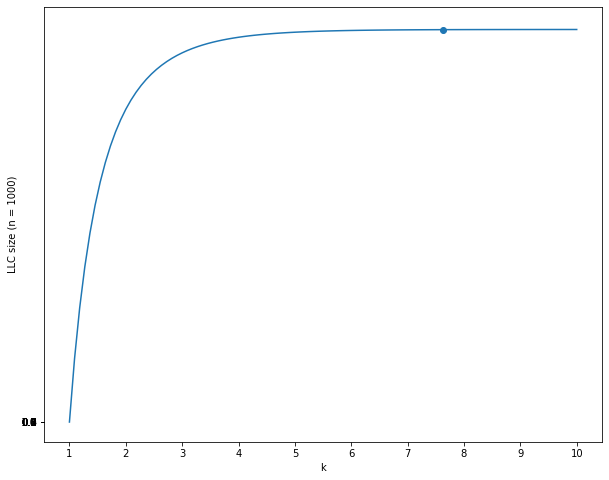

In [60]:
import matplotlib.pyplot as plt
import numpy as np

#linspace for k values
K = np.linspace(1, 10, 100)

n=1000
#calculate LLC for all k values, and fixed n
LLC = [calculate_LLC(n,k) for k in K]
LLCnorm = np.array(LLC)/n #normalized values
print(LLC[72])
print(LLC[73])
print(K[73])
#Plotting results
plt.figure(figsize=(10, 8))
plt.plot(K, LLC)
plt.scatter(K[73],LLC[73])
plt.xlabel("k")
plt.ylabel("LLC size (n = 1000)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.yticks([0.1,0.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.show()

We can see how how the LLC size increases in a hyperbolic kind of way, very rapidly at first and then stabilizes and demonstrates an asympotitic behavior. It seems like around "k=1.5" the LLC is at least half the size of the full graph in terms of the number of nodes. At around 3 is when the rapid growing stops, and from there the LLC is almost as big as the full graph, and the increase from there is very little since we are just getting "in" the last few isolated nodes little by little. At around 7.63 is when the LLC seems to have taken over the graph and now includes the 1000 nodes.

In [92]:
import networkx as nx
experimental_k = []  # average degree
experimental_lcc_size = []  # size of largest connected component
edge_prob = list(np.linspace(0.001,0.01,1000))
# Generate 100 different Erdős-Renyi random graphs with networkx.erdos_renyi_graph()
for p in edge_prob:
    G = nx.erdos_renyi_graph(1000,p)
    experimental_k.append(G.number_of_edges()*2/G.number_of_nodes())
    #experimental_k.append(np.mean(nx.degree(G).values()))
    experimental_lcc_size.append(len(max(nx.connected_components(G),key=len)))

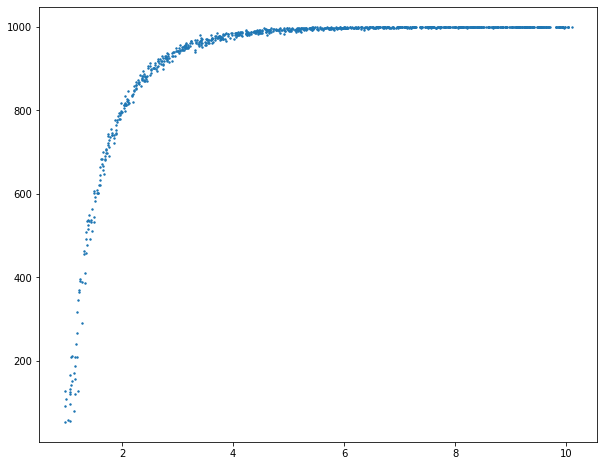

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(experimental_k,experimental_lcc_size, s=2)
plt.show()

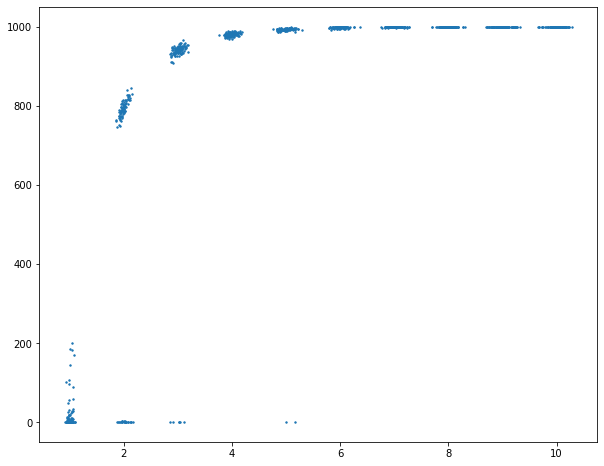

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(experimental_k,experimental_lcc_size, s=2)
plt.show()

In [87]:
import networkx as nx
experimental_k = []  # average degree
experimental_lcc_size = []  # size of largest connected component
edge_prob = list(np.linspace(0.001,0.01,5))
# Generate 100 different Erdős-Renyi random graphs with networkx.erdos_renyi_graph()
for p in edge_prob:
    for i in range(100):
        G = nx.erdos_renyi_graph(1000,p)
        experimental_k.append(G.number_of_edges()*2/G.number_of_nodes())
        #experimental_k.append(np.mean(nx.degree(G).values()))
        experimental_lcc_size.append(len(max(nx.connected_components(G))))

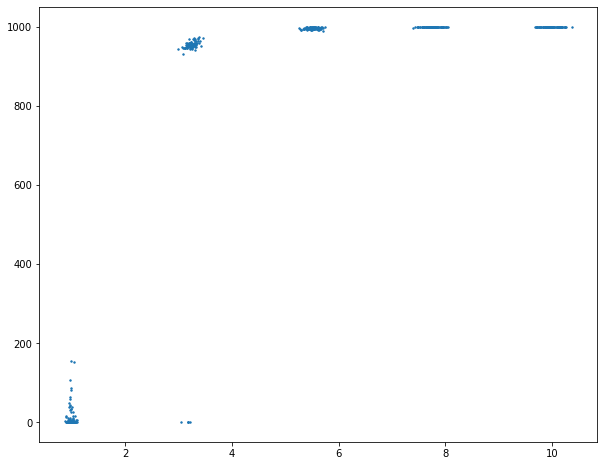

In [88]:
plt.figure(figsize=(10,8))
plt.scatter(experimental_k,experimental_lcc_size, s=2)
plt.show()